<a href="https://colab.research.google.com/github/PeterYves/DIC-ML-Assignmnent/blob/main/week4_house_prices_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Housing price regression

---



> ### [Problem 1] Feature selection for practice

---



In [8]:
import pandas as pd

df = pd.read_csv("train.csv")

train_df = df[["GrLivArea","YearBuilt", "SalePrice"]]
train_df

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000
...,...,...,...
1455,1647,1999,175000
1456,2073,1978,210000
1457,2340,1941,266500
1458,1078,1950,142125


> ### [Problem 2] Estimation and evaluation by linear regression

---




In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
X = train_df[['GrLivArea', 'YearBuilt']].values
y = train_df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1095, 2) (365, 2) (1095,) (365,)


In [11]:
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
pd.DataFrame([reg_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,150934.098802,196422.414794,135755.614031,245936.570415,152874.860905,131542.430291,145277.158197,323951.661145,166876.100726,223714.316521,...,200037.306559,140074.194143,115941.877926,181857.571887,125907.729144,150151.122124,89277.397199,287940.53093,222011.057834,153961.818321
1,179900.000000,257500.000000,135960.000000,236000.000000,131500.000000,148500.000000,141500.000000,302000.000000,144500.000000,375000.000000,...,217500.000000,149000.000000,55993.000000,176000.000000,141000.000000,113000.000000,120000.000000,260000.00000,212000.000000,149300.000000


In [15]:
print("Mean Squared Error:", mean_squared_error(y_test, reg_predict))

Mean Squared Error: 1886620967.3618784


In [17]:
# Visualization on a satter graph
def plot_graph(xlabel, ylabel, X, y_true, y_pred):
    plt.title('Visualization between ' + xlabel + ' and ' + ylabel)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.scatter(X, y_true, label='true value')
    plt.scatter(X, y_pred, label='predicted value')
    plt.legend()
    plt.show()

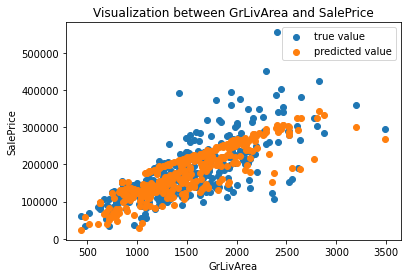

In [18]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, reg_predict)

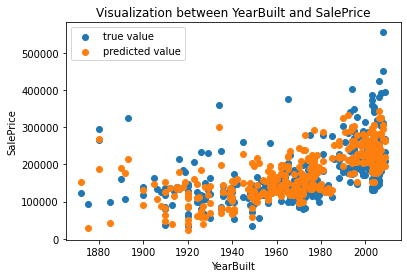

In [19]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, reg_predict)

> ### [Problem 3] Comparison of methods

---



In [20]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**- SVR:**

In [22]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, reg_predict))

Mean Squared Error:  1886620967.3618784


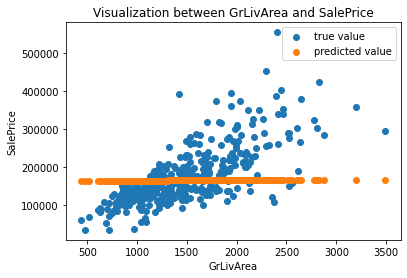

In [23]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, svr_predict)

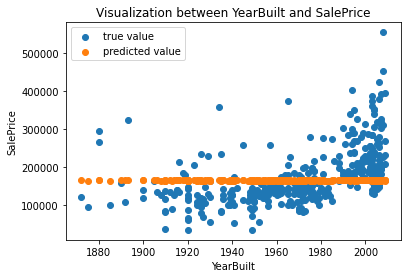

In [24]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, svr_predict)

**- Decision tree**

In [25]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, d_tree_predict))

Mean Squared Error:  2853374102.14102


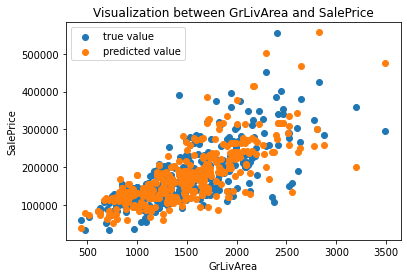

In [26]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, d_tree_predict)

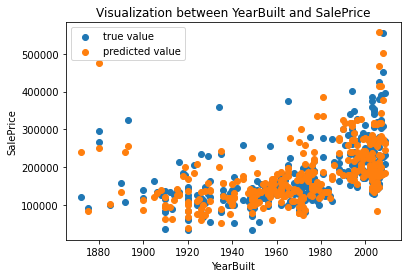

In [27]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, d_tree_predict)

**- Random forest**

In [28]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, rand_forest_predict))

Mean Squared Error:  1739876045.316354


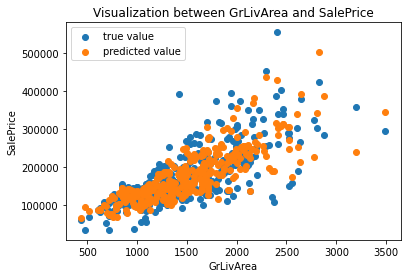

In [29]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, rand_forest_predict)

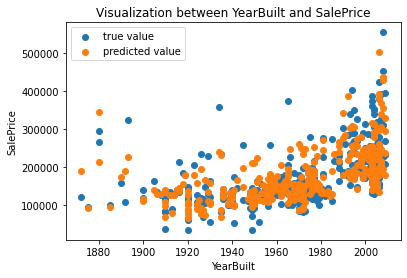

In [30]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, rand_forest_predict)

> ### [Problem 4] (Advance assignment) Learning using other features

---



In [31]:
train_df2 = df[["GrLivArea","YearBuilt", "SalePrice", "LotArea", "YrSold"]]
train_df2

,GrLivArea,YearBuilt,SalePrice,LotArea,YrSold
0,1710,2003,208500,8450,2008
1,1262,1976,181500,9600,2007
2,1786,2001,223500,11250,2008
3,1717,1915,140000,9550,2006
4,2198,2000,250000,14260,2008
...,...,...,...,...,...
1455,1647,1999,175000,7917,2007
1456,2073,1978,210000,13175,2010
1457,2340,1941,266500,9042,2010
1458,1078,1950,142125,9717,2010


In [34]:
X = train_df2[["GrLivArea","YearBuilt", "LotArea", "YrSold"]].values
y = train_df2['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y)

**- Linear regression**

In [35]:
reg = LinearRegression().fit(X_train, y_train)
reg_predict = reg.predict(X_test)
pd.DataFrame([reg_predict, y_test])

,0,1,2,3,4,5,6,7,8,9,...,355,356,357,358,359,360,361,362,363,364
0,190665.987422,127694.933024,282413.96004,99991.058159,232509.595409,137525.11228,115791.028889,132205.695317,96427.877229,162304.722884,...,214745.769696,295585.221088,319626.734033,226520.941592,220014.711179,263378.929064,225632.547944,378609.576238,183657.140462,228337.127169
1,175000.000000,143250.000000,239686.00000,139000.000000,248900.000000,134450.00000,80000.000000,151000.000000,110000.000000,143500.000000,...,192500.000000,240000.000000,301000.000000,165400.000000,187000.000000,253000.000000,328900.000000,430000.000000,158000.000000,222000.000000


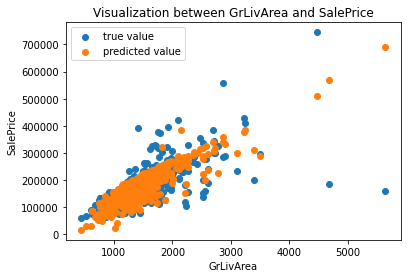

In [36]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, reg_predict)

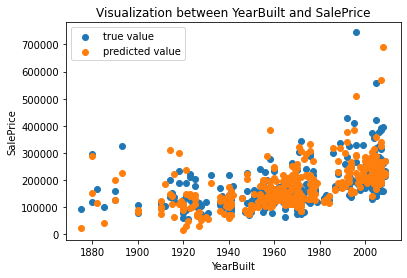

In [37]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, reg_predict)

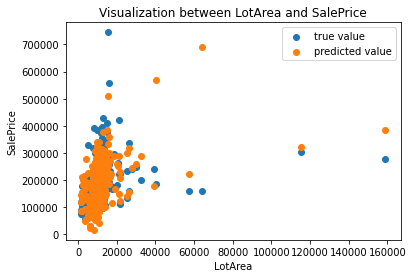

In [38]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, reg_predict)

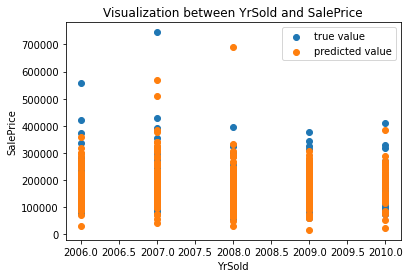

In [39]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, reg_predict)

**- SVR**

In [40]:
svr = SVR()
svr.fit(X_train, y_train)
svr_predict = svr.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, reg_predict))

Mean Squared Error:  3007095104.392283


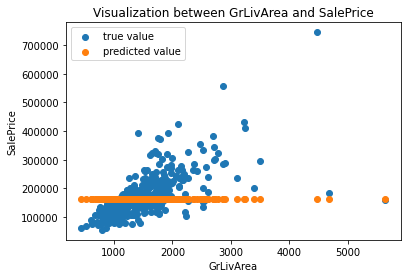

In [41]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, svr_predict)

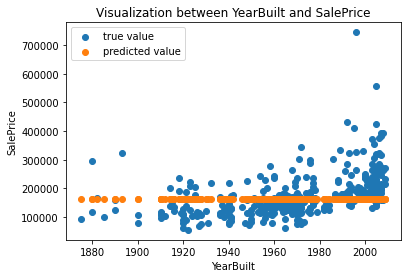

In [42]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, svr_predict)

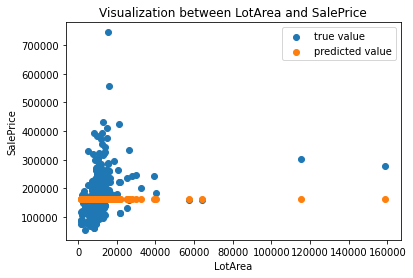

In [43]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, svr_predict)

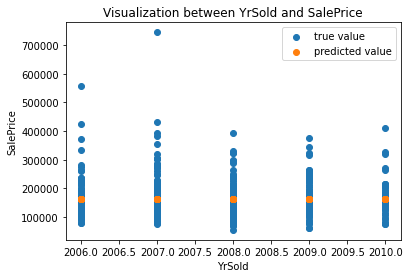

In [45]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, svr_predict)

**- Decision tree**

In [46]:
d_tree = DecisionTreeRegressor()
d_tree.fit(X_train, y_train)
d_tree_predict = d_tree.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, d_tree_predict))

Mean Squared Error:  4511862493.386301


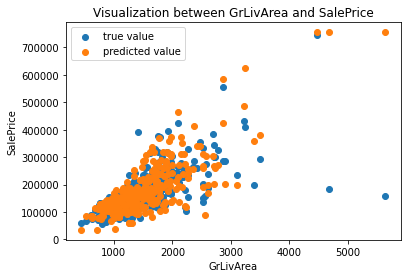

In [47]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, d_tree_predict)

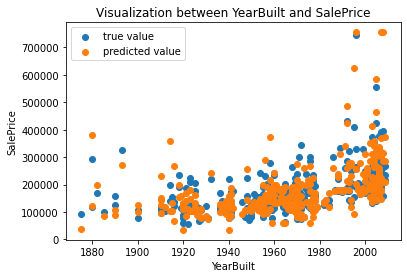

In [48]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, d_tree_predict)

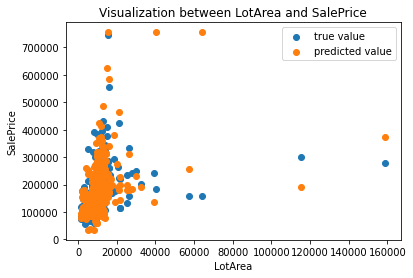

In [49]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, d_tree_predict)

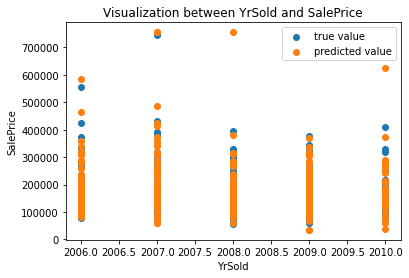

In [50]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, d_tree_predict)

**- Random forest**

In [54]:
rand_forest = RandomForestRegressor()
rand_forest.fit(X_train, y_train)
rand_forest_predict = rand_forest.predict(X_test)
print("Mean Squared Error: ",mean_squared_error(y_test, rand_forest_predict))

Mean Squared Error:  2411864617.127911


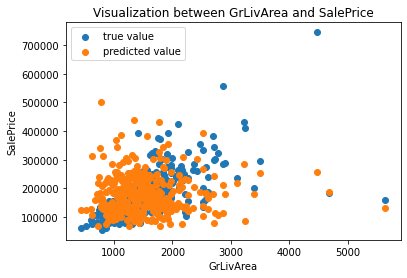

In [53]:
plot_graph('GrLivArea', 'SalePrice', X_test[:, 0], y_test, rand_forest_predict)

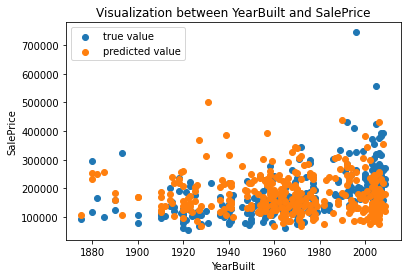

In [52]:
plot_graph('YearBuilt', 'SalePrice', X_test[:, 1], y_test, rand_forest_predict)

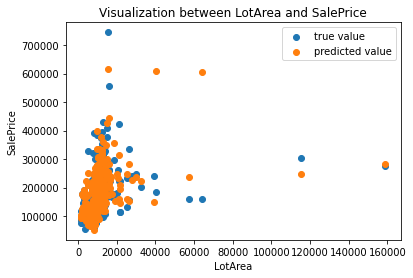

In [55]:
plot_graph('LotArea', 'SalePrice', X_test[:, 2], y_test, rand_forest_predict)

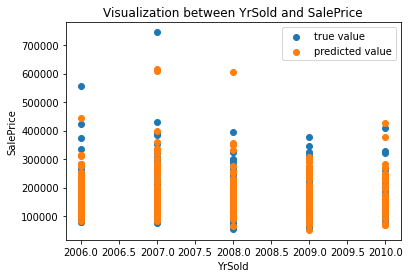

In [56]:
plot_graph('YrSold', 'SalePrice', X_test[:, 3], y_test, rand_forest_predict)